<a id="Introduction"></a> <br>


# **1. Introduction:** 

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

In [45]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [46]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [47]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



<h2>Let's start looking through target variable and their distribuition</h2>

In [48]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kerne

In [49]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\plotly\tools.py:452: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3165110996.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3165110996.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




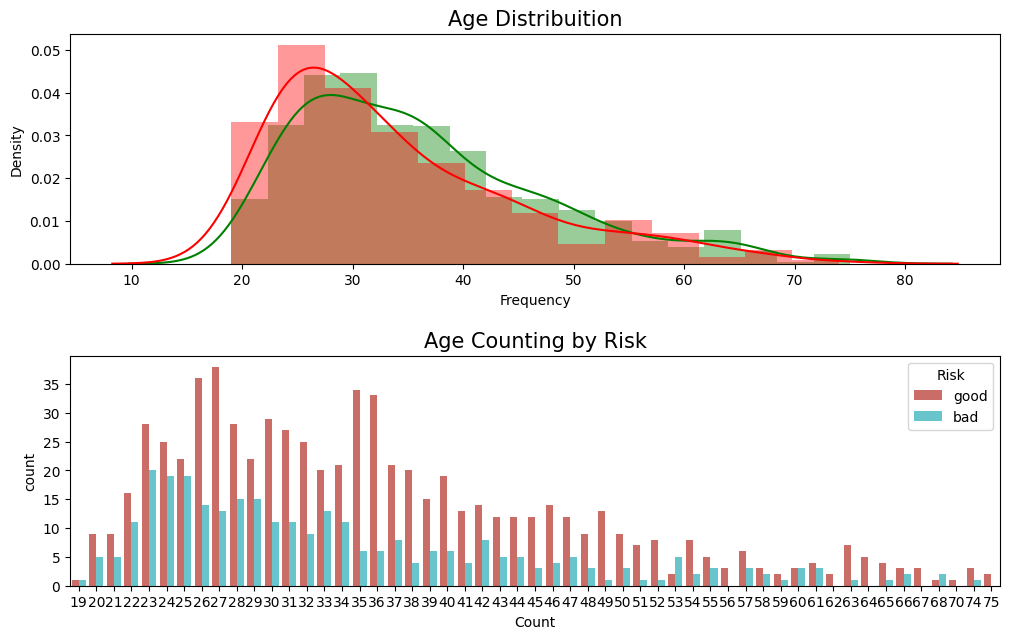

In [50]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<h2>Creating an categorical variable to handle with the Age variable </h2>

In [51]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [52]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Interesting distribuition

<h2>I will now Look the distribuition of Housing own and rent by Risk</h2>


In [53]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

<h3>Distribuition of Credit Amount by Housing</h3>

In [54]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Interesting moviments! Highest values come from category "free" and we have a different distribuition by Risk

<h2>Looking the diference by Sex</h2>

In [55]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\plotly\tools.py:452: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<b> How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

I will create categories of Age and look the distribuition of Credit Amount by Risk...


I will do some explorations through the Job
- Distribuition
- Crossed by Credit amount
- Crossed by Age

In [56]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [57]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [58]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

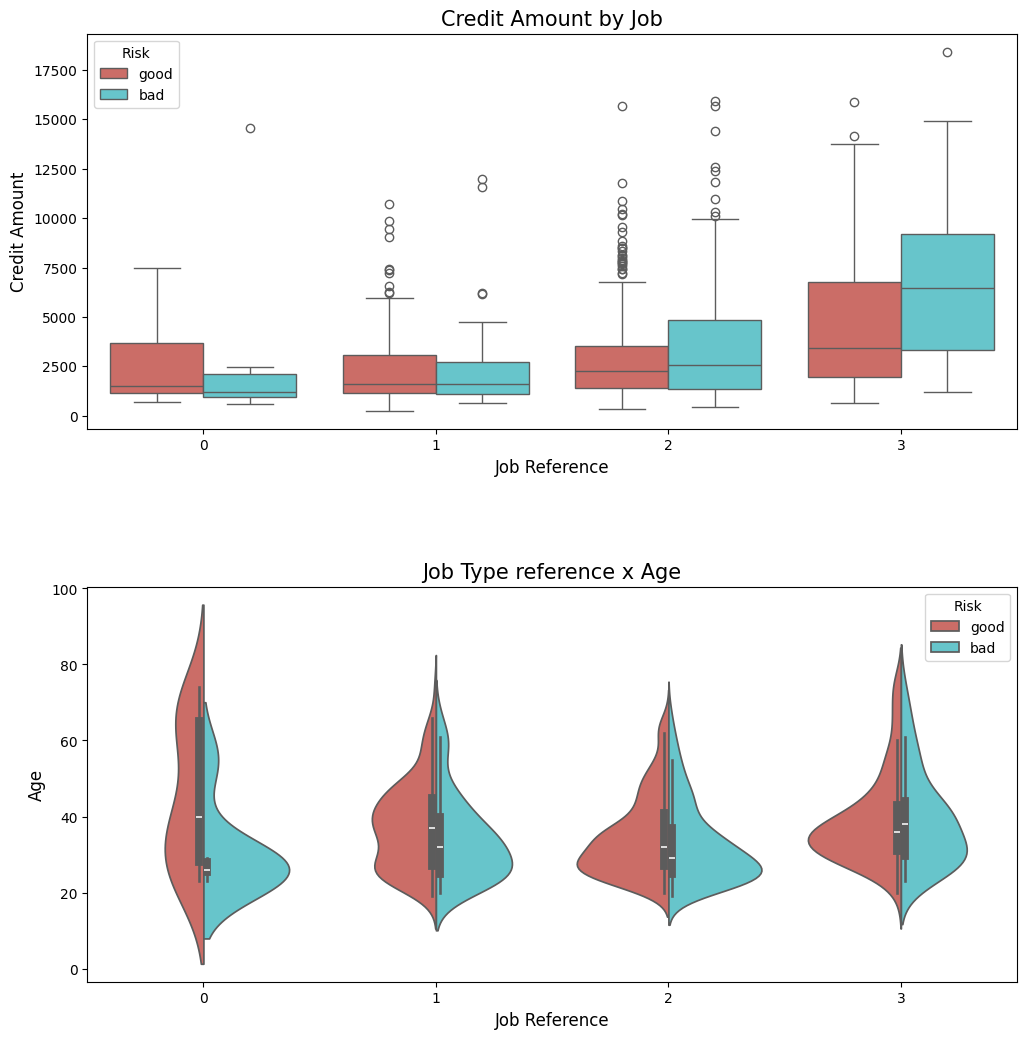

In [59]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Looking the distribuition of Credit Amont

In [60]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\98572243.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\98572243.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




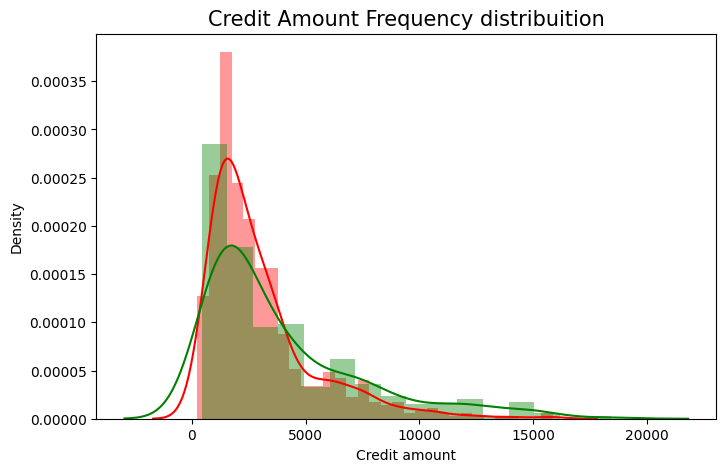

In [61]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distruibution of Saving accounts by Risk

In [62]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\plotly\tools.py:452: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


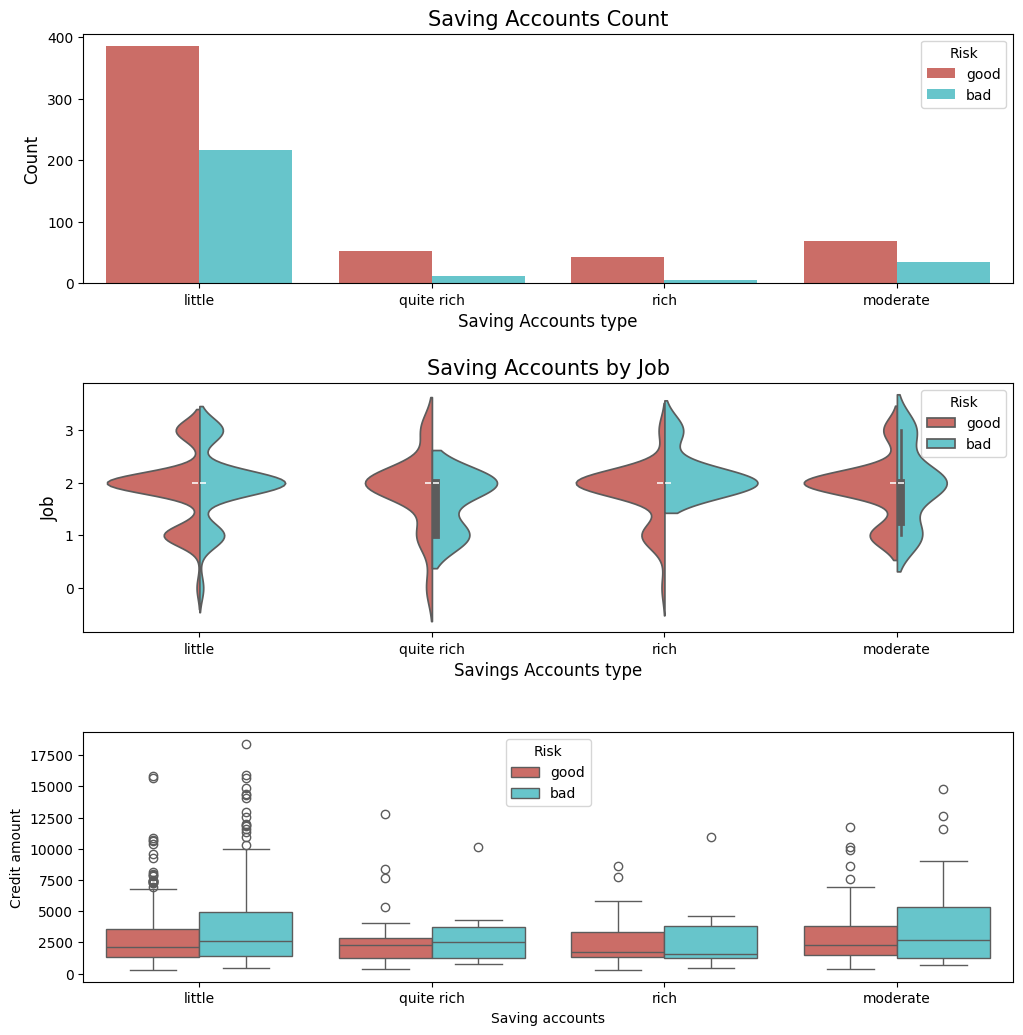

In [63]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Pretty and interesting distribution...

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3179296861.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3179296861.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



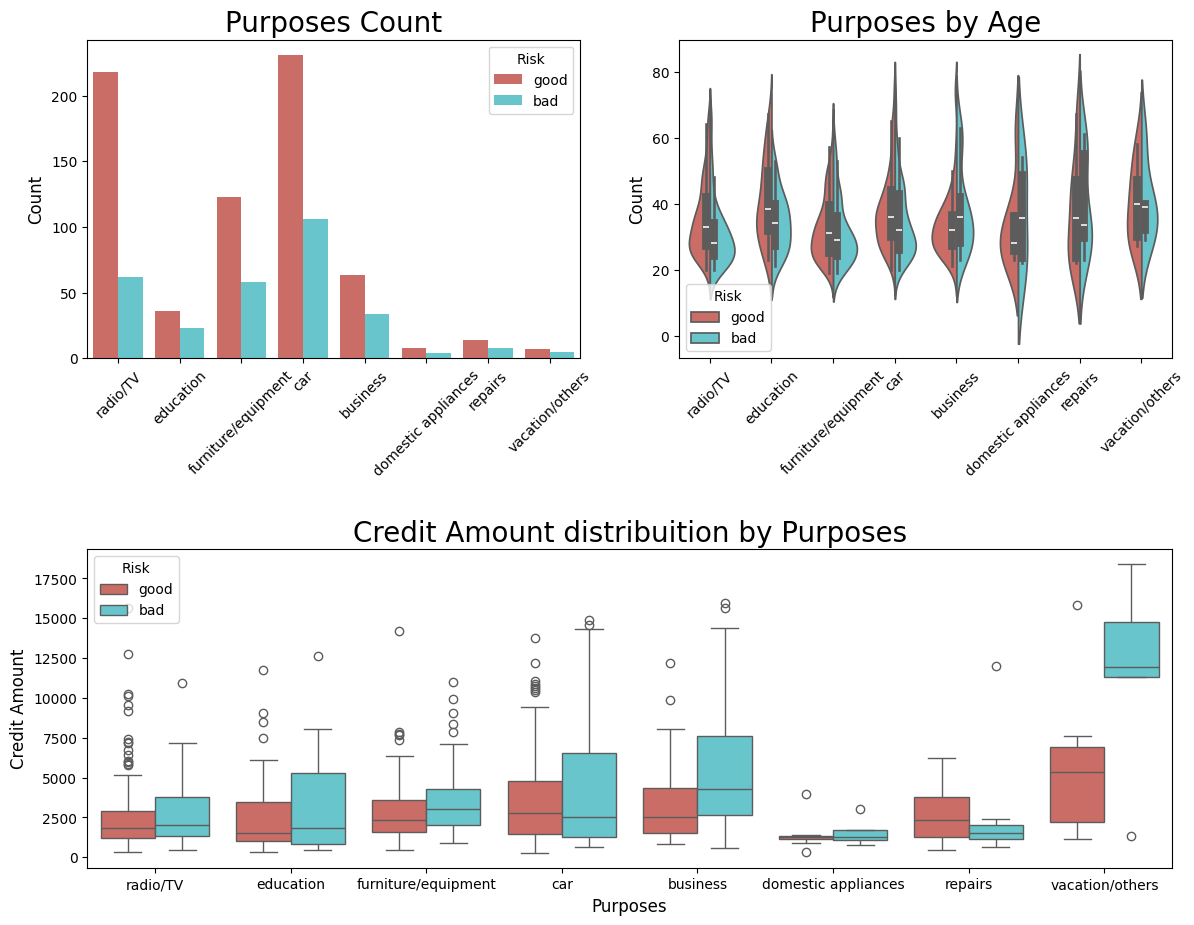

In [64]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density

C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3076791316.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ayush\AppData\Local\Temp\ipykernel_26396\3076791316.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




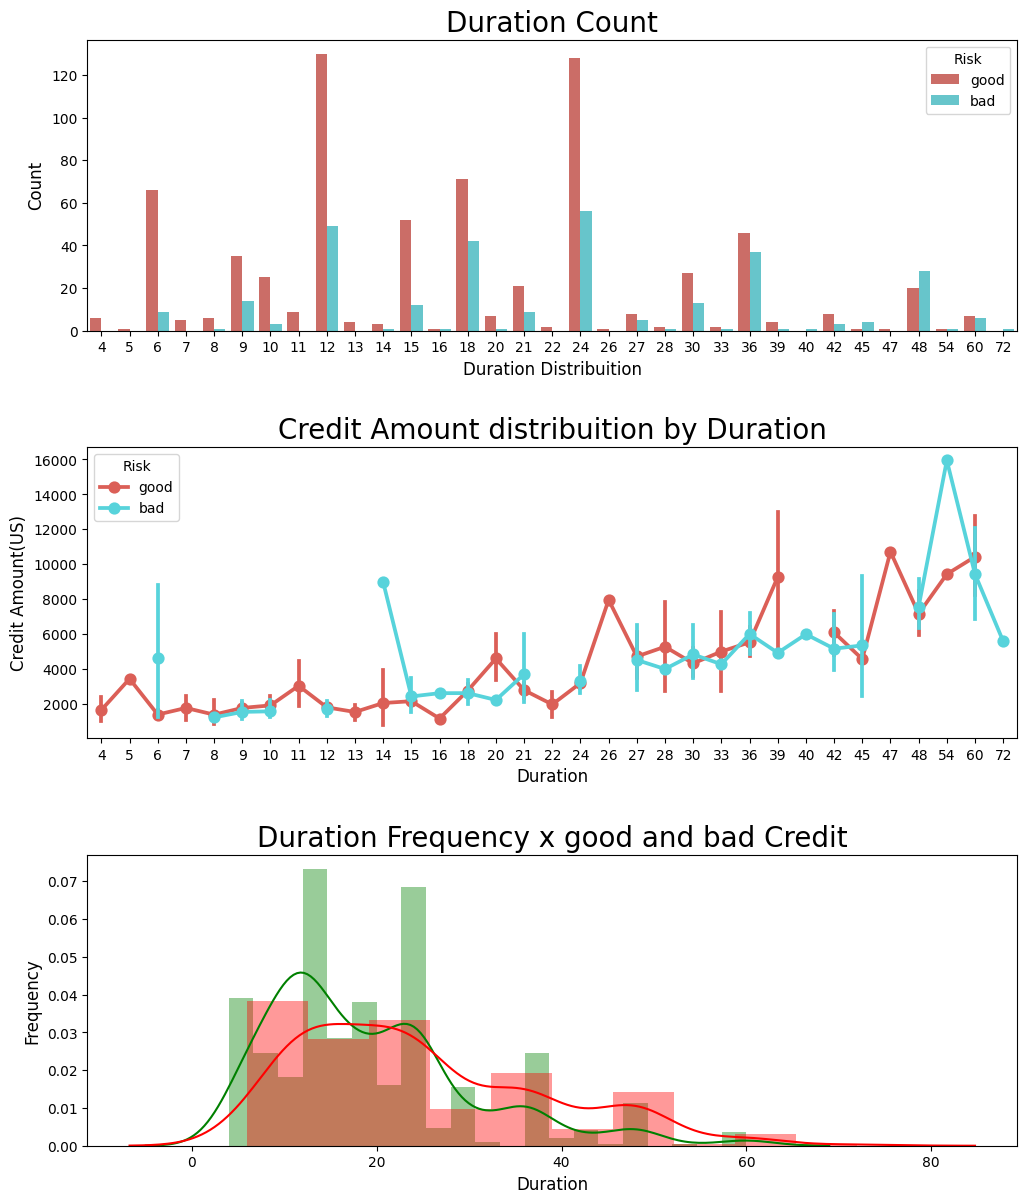

In [65]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()


Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2> Checking Account variable </h2>

First, let's look the distribuition 

In [66]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts

In [67]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

The old plot that I am trying to substitute with interactive plots

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


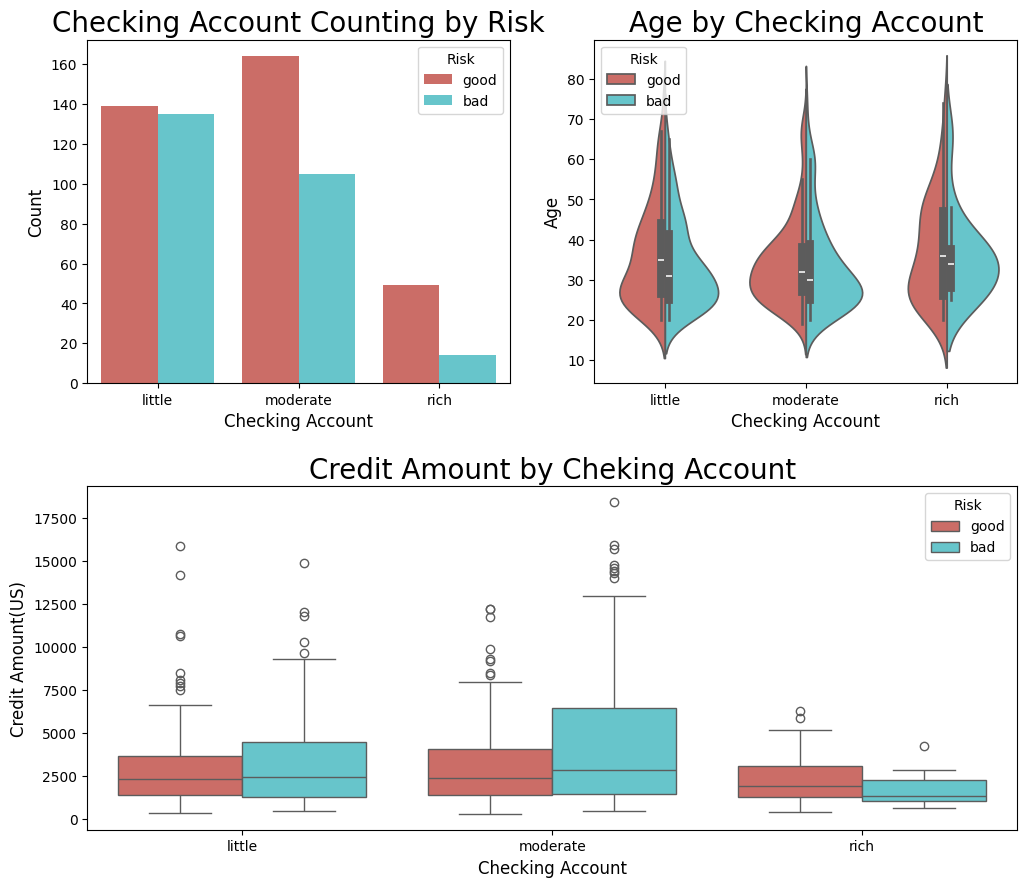

In [68]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Crosstab session and anothers to explore our data by another metrics a little deep

In [69]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


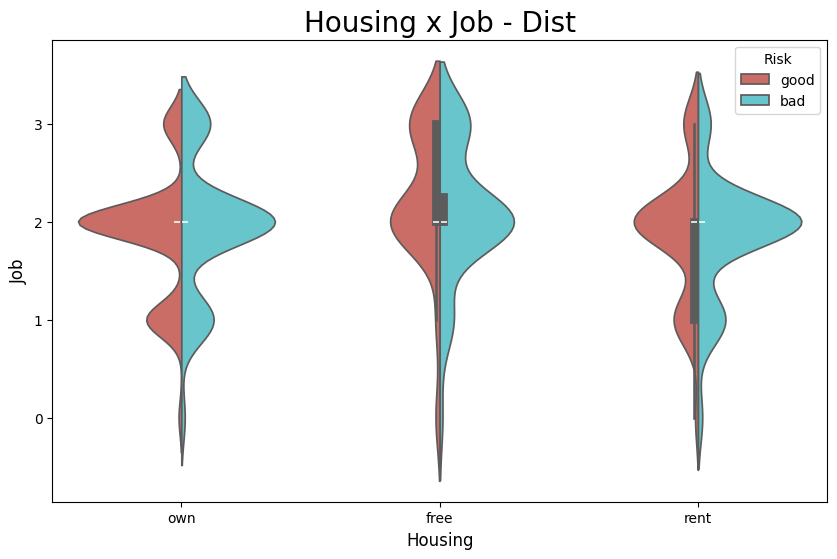

In [70]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [71]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [72]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [73]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


## Looking the total of values in each categorical feature

In [74]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Let's do some feature engineering on this values and create variable Dummies of the values

In [75]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Transforming the data into Dummy variables

In [76]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

## Deleting the old features

In [77]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# **5. Correlation:** <a id="Correlation"></a> <br>
- Looking the data correlation
<h1>Looking the correlation of the data

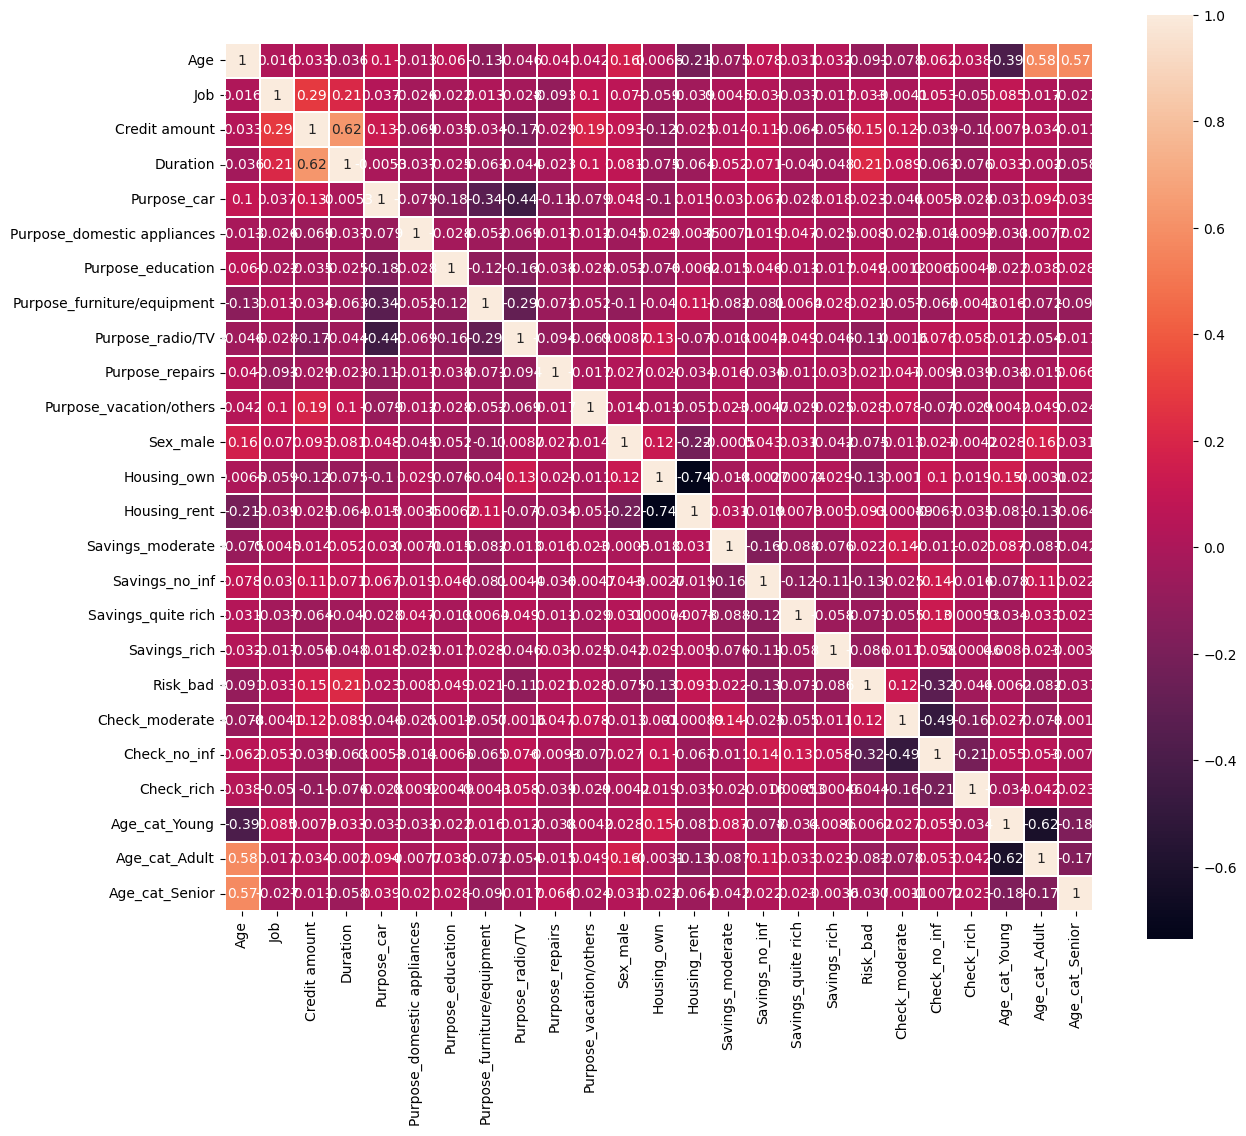

In [78]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [79]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [80]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [81]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [103]:
#Creating the X and y variables
X = df_credit.drop(["Risk_bad"], axis=1)
y = df_credit["Risk_bad"]

# Spliting X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

LR: 0.732941 (0.055693)
LDA: 0.725882 (0.051564)
KNN: 0.661176 (0.064823)
CART: 0.668235 (0.046407)
NB: 0.697647 (0.044035)
RF: 0.714118 (0.056679)
SVM: 0.702353 (0.044968)
XGB: 0.740000 (0.065387)


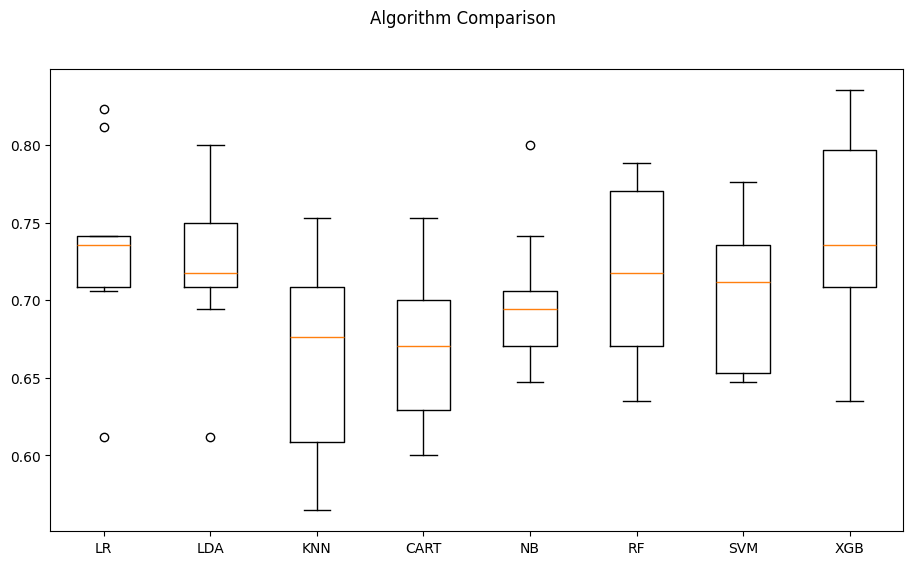

In [104]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Very interesting. Almost all models shows a low value to recall. 

We can observe that our best results was with CART, NB and XGBoost. <br>
I will implement some models and try to do a simple Tunning on them

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [105]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

def demographic_parity_difference(y_true, y_pred, sensitive_attr):
    """
    Computes Demographic Parity Difference (DPD) for binary sensitive attribute.
    """
    mask_male = (sensitive_attr == 1)
    mask_female = (sensitive_attr == 0)

    prob_male = y_pred[mask_male].mean() if mask_male.any() else 0
    prob_female = y_pred[mask_female].mean() if mask_female.any() else 0

    return abs(prob_male - prob_female)

def custom_score(y_true, y_pred, sensitive_attr, alpha=0.7):
    """
    Weighted score: alpha * accuracy + (1 - alpha) * (1 - DPD)
    """
    acc = accuracy_score(y_true, y_pred)
    dpd = demographic_parity_difference(y_true, y_pred, sensitive_attr)
    return alpha * acc + (1 - alpha) * (1 - dpd)

# Make scorer for GridSearchCV (requires wrapping sensitive_attr)
def make_custom_scorer(sensitive_attr, alpha=0.7):
    def scorer(estimator, X, y_true):
        y_pred = estimator.predict(X)
        return custom_score(y_true, y_pred, sensitive_attr, alpha)
    return make_scorer(scorer, greater_is_better=True)


In [108]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   int64  
 4   Purpose_car                  1000 non-null   bool   
 5   Purpose_domestic appliances  1000 non-null   bool   
 6   Purpose_education            1000 non-null   bool   
 7   Purpose_furniture/equipment  1000 non-null   bool   
 8   Purpose_radio/TV             1000 non-null   bool   
 9   Purpose_repairs              1000 non-null   bool   
 10  Purpose_vacation/others      1000 non-null   bool   
 11  Sex_male                     1000 non-null   bool   
 12  Housing_own                  1000 non-null   bool   
 13  Housing_rent            

In [107]:
# XGBoost classifier
model = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "n_estimators": [3, 10, 50, 150],
    "colsample_bytree": [0.4, 0.7, 1.0],
}

# Suppose X_train has a column 'sex_male' (1 for male, 0 for not)
sensitive_attr_train = X_train['Sex_male'].values

# Create custom scorer
custom_scorer = make_custom_scorer(sensitive_attr_train, alpha=0.7)

# Grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=custom_scorer, verbose=4)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END colsample_bytree=0.4, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, max_depth=3, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 5/5] END colsample_bytree=0.4, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=3, n_estimators=50;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, max_depth=3, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.4, max_depth=3, n_estimators=150;, score=nan total time=   0.5s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=3, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=3, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=3, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=3, n_estimators=150;, score=nan total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=5, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 4/5] END colsample_bytree=0.4, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 2/5] END colsample_bytree=0.4, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=5, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=5, n_estimators=50;, score=nan total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=5, n_estimators=50;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, max_depth=5, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=0.4, max_depth=5, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=5, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=5, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=5, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=5, n_estimators=150;, score=nan total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=7, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 2/5] END colsample_bytree=0.4, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.4, max_depth=7, n_estimators=50;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.4, max_depth=7, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=7, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=7, n_estimators=150;, score=nan total time=   0.5s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=7, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=7, n_estimators=150;, score=nan total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, max_depth=10, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 5/5] END colsample_bytree=0.4, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, max_depth=10, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, max_depth=10, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=0.4, max_depth=10, n_estimators=50;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=10, n_estimators=50;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=10, n_estimators=50;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=10, n_estimators=50;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=10, n_estimators=50;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.4, max_depth=10, n_estimators=150;, score=nan total time=   0.9s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.4, max_depth=10, n_estimators=150;, score=nan total time=   0.7s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.4, max_depth=10, n_estimators=150;, score=nan total time=   0.5s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.4, max_depth=10, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.4, max_depth=10, n_estimators=150;, score=nan total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=3, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=0.7, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 5/5] END colsample_bytree=0.7, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=3, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=3, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=3, n_estimators=150;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=3, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=3, n_estimators=150;, score=nan total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, max_depth=5, n_estimators=3;, score=nan total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, max_depth=5, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 3/5] END colsample_bytree=0.7, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=5, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=5, n_estimators=10;, score=nan total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, max_depth=5, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=5, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=5, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=5, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=5, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=5, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=5, n_estimators=150;, score=nan total time=   0.5s
[CV 1/5] END colsample_bytree=0.7, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=7, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 3/5] END colsample_bytree=0.7, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, max_depth=7, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=7, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=0.7, max_depth=7, n_estimators=10;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=7, n_estimators=10;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=7, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=7, n_estimators=50;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=7, n_estimators=50;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=7, n_estimators=150;, score=nan total time=   0.5s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=7, n_estimators=150;, score=nan total time=   1.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=7, n_estimators=150;, score=nan total time=   0.8s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=7, n_estimators=150;, score=nan total time=   0.6s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=7, n_estimators=150;, score=nan total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=10, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, max_depth=10, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=10, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, max_depth=10, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 4/5] END colsample_bytree=0.7, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, max_depth=10, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=10, n_estimators=50;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=10, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=10, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=10, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=10, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=0.7, max_depth=10, n_estimators=150;, score=nan total time=   0.4s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=0.7, max_depth=10, n_estimators=150;, score=nan total time=   0.7s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=0.7, max_depth=10, n_estimators=150;, score=nan total time=   0.6s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=0.7, max_depth=10, n_estimators=150;, score=nan total time=   1.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=0.7, max_depth=10, n_estimators=150;, score=nan total time=   1.2s
[CV 1/5] END colsample_bytree=1.0, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, max_depth=3, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=1.0, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, max_depth=3, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, max_depth=3, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=1.0, max_depth=3, n_estimators=10;, score=nan total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 3/5] END colsample_bytree=1.0, max_depth=3, n_estimators=10;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 4/5] END colsample_bytree=1.0, max_depth=3, n_estimators=10;, score=nan total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 1/5] END colsample_bytree=1.0, max_depth=3, n_estimators=50;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=1.0, max_depth=3, n_estimators=50;, score=nan total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, max_depth=3, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 4/5] END colsample_bytree=1.0, max_depth=3, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 5/5] END colsample_bytree=1.0, max_depth=3, n_estimators=50;, score=nan total time=   0.1s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 1/5] END colsample_bytree=1.0, max_depth=3, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 2/5] END colsample_bytree=1.0, max_depth=3, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 3/5] END colsample_bytree=1.0, max_depth=3, n_estimators=150;, score=nan total time=   0.3s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 4/5] END colsample_bytree=1.0, max_depth=3, n_estimators=150;, score=nan total time=   0.2s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_fun

[CV 5/5] END colsample_bytree=1.0, max_depth=3, n_estimators=150;, score=nan total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, max_depth=5, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, max_depth=5, n_estimators=3;, score=nan total time=   0.0s


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:17:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\ayush\OneDrive - iiit-b\CollegeAcads\Sem6\MOML\Project\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
         

[CV 5/5] END colsample_bytree=1.0, max_depth=5, n_estimators=3;, score=nan total time=   0.0s


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

In [ ]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

Very sucks results! How can I increase my model? 

# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

With the Gaussian Model we got a best recall. 

## Let's verify the ROC curve

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

## Implementing a pipeline of models 

In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

How can I avoid of this 

# Please, how can I increase this sucks models ?

In [ ]:
grid_search.best_score_
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

How can I avoid this error? 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
